In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# WARNING, FILE "flightdelay_data.csv" IS 1.37 GB

delay = pd.read_csv("./Resources/flightdelay_data.csv", encoding = 'utf-8')
delay

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,2300-2359,1,11,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489058,12,7,0,1800-1859,1,11,2,123,Hawaiian Airlines Inc.,1318,...,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489059,12,7,0,2000-2059,1,11,2,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489060,12,7,0,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


# 1. Data Exploration

In [3]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [4]:
# Missing data
delay.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [5]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"MONTH" has 12 unique values, from 1 to 12
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 11 unique values, from 1 to 11
"SEGMENT_NUMBER" has 15 unique values, from 1 to 15
"CONCURRENT_FLIGHTS" has 107 unique values, from 1 to 109
"NUMBER_OF_SEATS" has 82 unique values, from 44 to 337
"CARRIER_NAME" has 17 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 969 unique values, from 1100 to 35256
"AIRLINE_FLIGHTS_MONTH" has 204 unique values, from 5582 to 117728
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 2119 unique values, from 1 to 21837
"AVG_MONTHLY_PASS_AIRPORT" has 96 unique values, from 70476 to 4365661
"AVG_MONTHLY_PASS_AIRLINE" has 17 unique values, from 473794 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 14 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER_PASS" has 17 unique values, from 7.134694872433899e

In [6]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    5261694
1    1227368
Name: DEP_DEL15, dtype: int64

In [7]:
# Number of airports
delay['DEPARTING_AIRPORT'].nunique()

96

In [8]:
# Number of flights per airport
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
Adams Field                           12067
Albany International                   5632
Albuquerque International Sunport     23403
Anchorage International               18828
Atlanta Municipal                    392603
                                      ...  
Tucson International                  19036
Tulsa International                   16781
Washington Dulles International       68232
Will Rogers World                     23653
William P Hobby                       58524
Name: DEP_DEL15, Length: 96, dtype: int64

In [9]:
# Airport with least number of flights
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().min()

84

In [10]:
# Grouped by airport: count of delay/on-time
print(delay.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT                  DEP_DEL15
Adams Field                        0            10135
                                   1             1932
Albany International               0             4596
                                   1             1036
Albuquerque International Sunport  0            19559
                                                ...  
Washington Dulles International    1            10727
Will Rogers World                  0            19669
                                   1             3984
William P Hobby                    0            44079
                                   1            14445
Name: MONTH, Length: 192, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

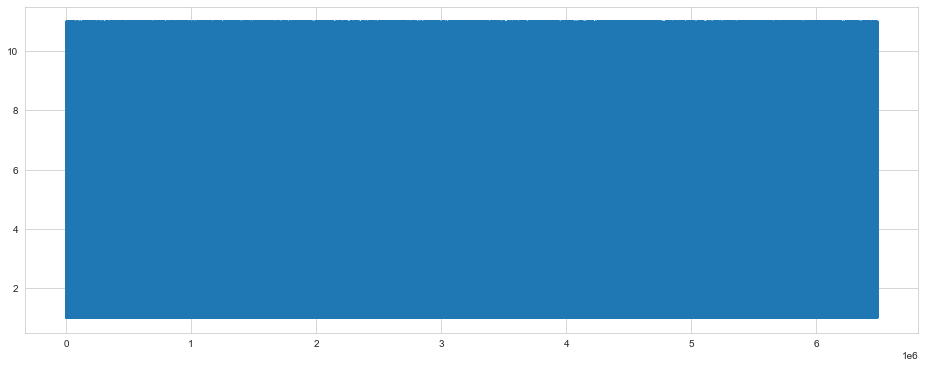

In [11]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

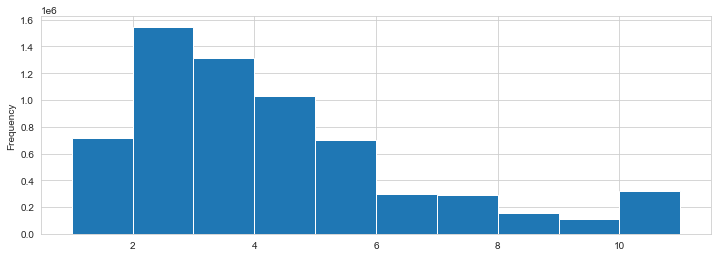

In [12]:

delay['DISTANCE_GROUP'].plot(kind='hist', figsize=(12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

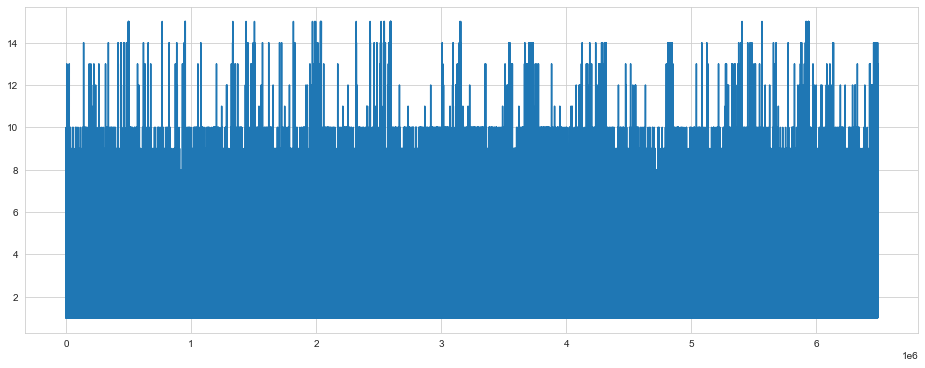

In [13]:
delay["SEGMENT_NUMBER"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

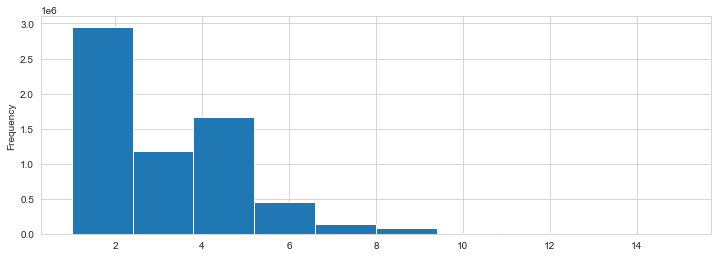

In [14]:
delay['SEGMENT_NUMBER'].plot(kind='hist', figsize=(12, 4))

### Concurrent flights

<AxesSubplot:>

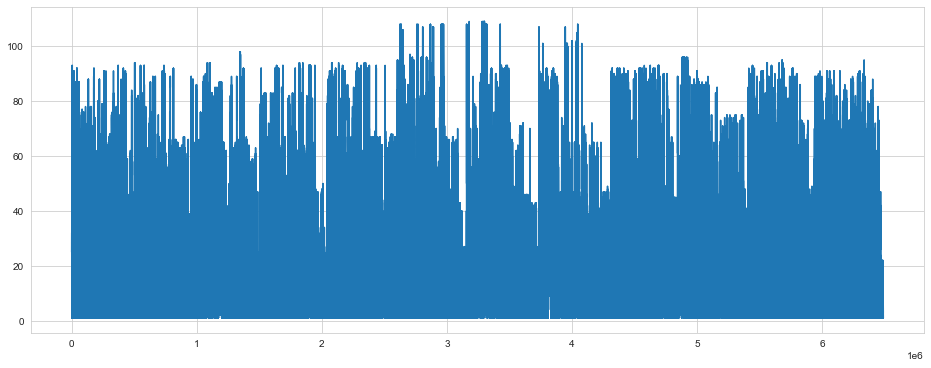

In [15]:
delay["CONCURRENT_FLIGHTS"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

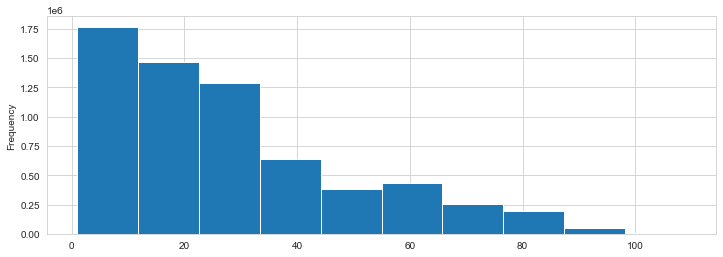

In [16]:
delay['CONCURRENT_FLIGHTS'].plot(kind='hist', figsize=(12, 4))

### Number of seats

<AxesSubplot:>

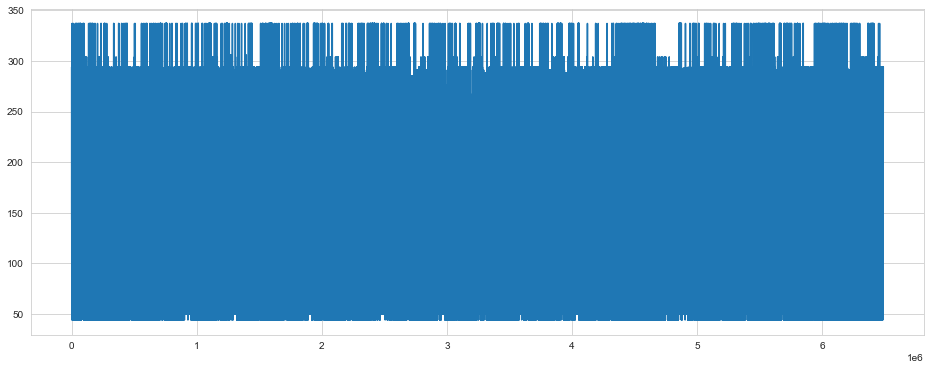

In [17]:
delay["NUMBER_OF_SEATS"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

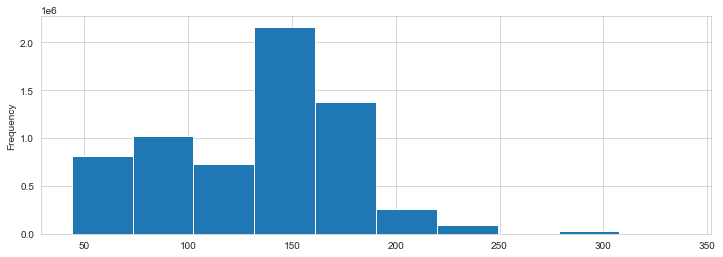

In [18]:
delay['NUMBER_OF_SEATS'].plot(kind='hist', figsize=(12, 4))

### Airport flights per month

<AxesSubplot:>

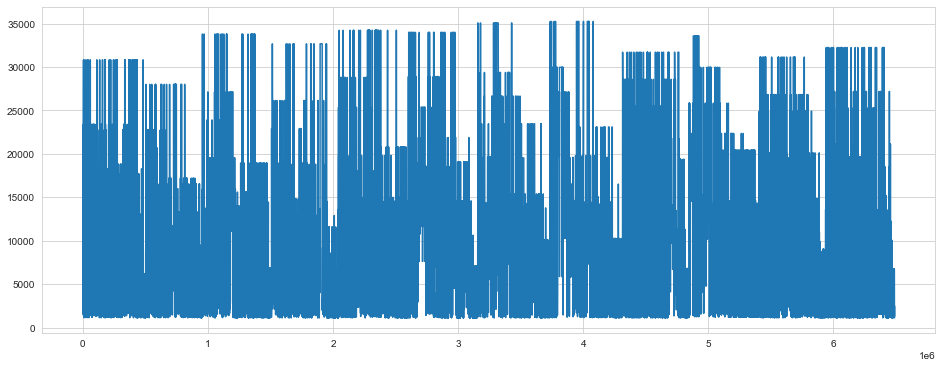

In [19]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

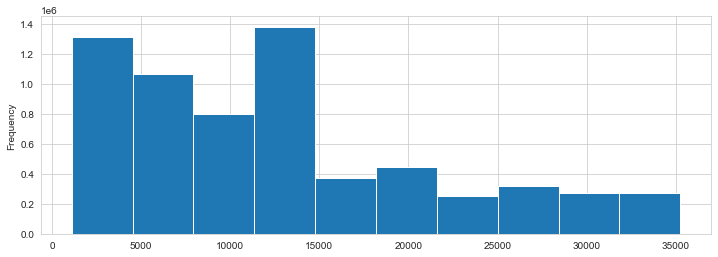

In [20]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind='hist', figsize=(12, 4))

### Airline flights per month

<AxesSubplot:>

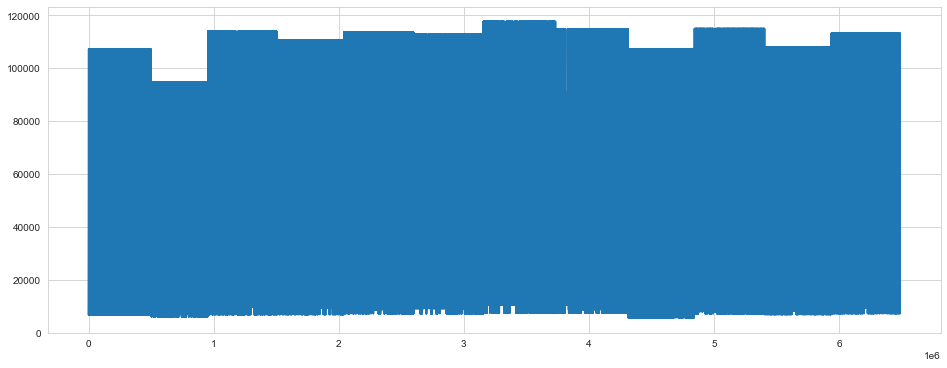

In [21]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

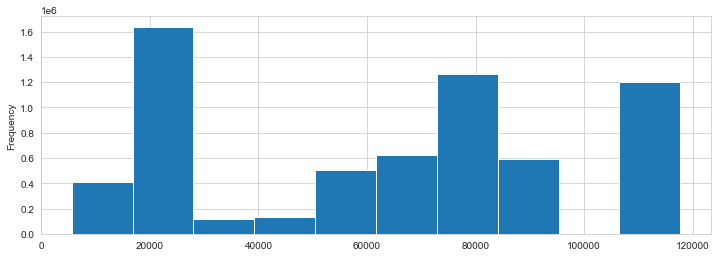

In [22]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind='hist', figsize=(12, 4))

### Plane age

<AxesSubplot:>

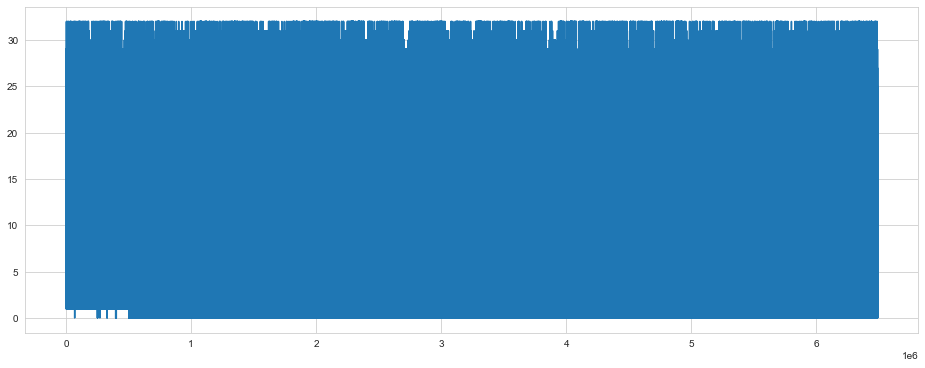

In [23]:
delay["PLANE_AGE"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

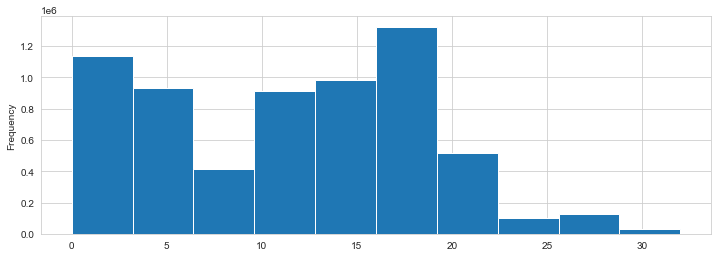

In [24]:
delay['PLANE_AGE'].plot(kind='hist', figsize=(12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

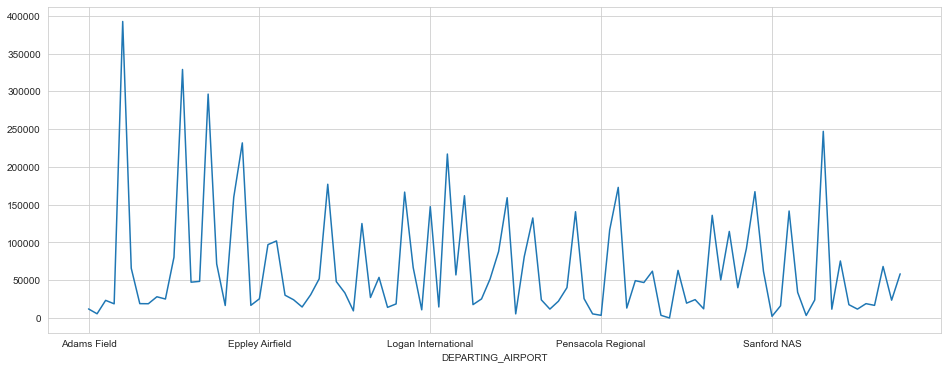

In [25]:
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize=(16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

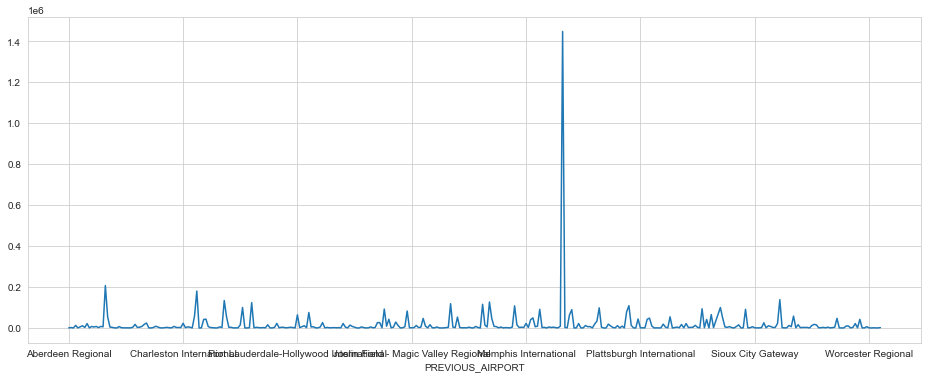

In [26]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize=(16, 6))

### Precipitation

<AxesSubplot:>

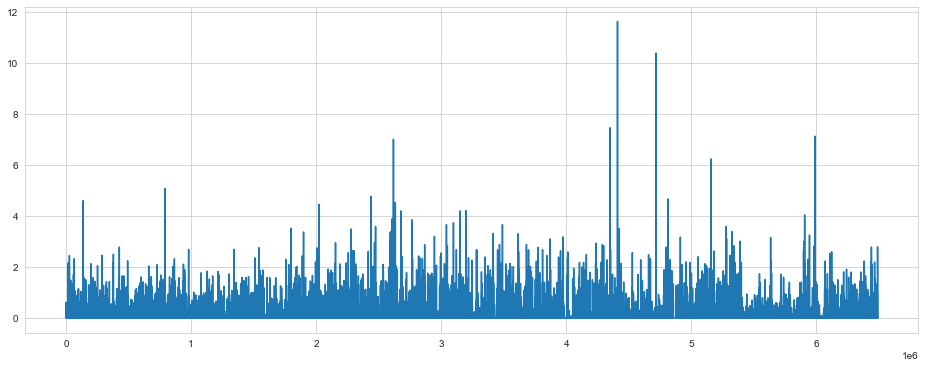

In [27]:
delay["PRCP"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

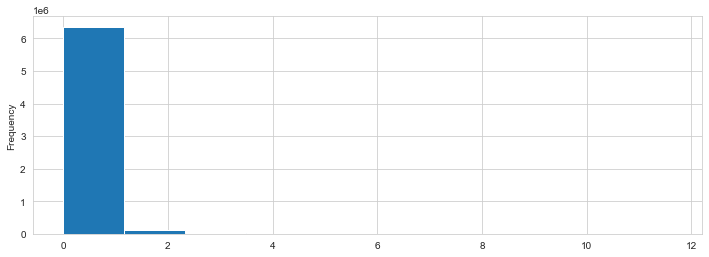

In [28]:
delay['PRCP'].plot(kind='hist', figsize=(12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

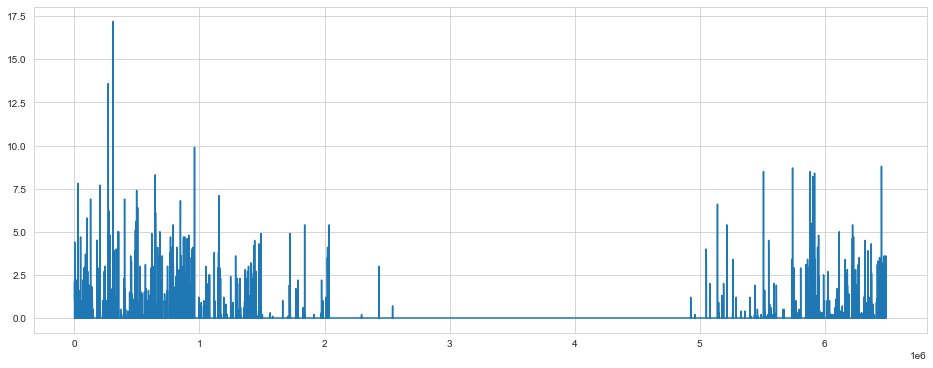

In [29]:
delay["SNOW"].plot(figsize=(16, 6))

In [ ]:
delay['SNOW'].plot(kind='hist', figsize=(12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

In [ ]:
delay["SNWD"].plot(figsize=(16, 6))

In [ ]:
delay['SNWD'].plot(kind='hist', figsize=(12, 4))

### Temperature

In [ ]:
delay["TMAX"].plot(figsize=(16, 6))

In [ ]:
delay['TMAX'].plot(kind='hist', figsize=(12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

In [ ]:
delay["AWND"].plot(figsize=(16, 6))

In [ ]:
delay['AWND'].plot(kind='hist', figsize=(12, 4))

# 2. Data Cleanup